In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [180]:
df = pd.read_csv('prob2data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,yr_built
0,7129300520,221900.0,3,1.00,1180,1.0,1955
1,6414100192,538000.0,3,2.25,2570,2.0,1951
2,5631500400,180000.0,2,1.00,770,1.0,1933
3,2487200875,604000.0,4,3.00,1960,1.0,1965
4,1954400510,510000.0,3,2.00,1680,1.0,1987


## Dropping id column

In [181]:
df = df.drop(['id'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,floors,yr_built
0,221900.0,3,1.00,1180,1.0,1955
1,538000.0,3,2.25,2570,2.0,1951
2,180000.0,2,1.00,770,1.0,1933
3,604000.0,4,3.00,1960,1.0,1965
4,510000.0,3,2.00,1680,1.0,1987
...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,2009
21609,400000.0,4,2.50,2310,2.0,2014
21610,402101.0,2,0.75,1020,2.0,2009
21611,400000.0,3,2.50,1600,2.0,2004


## Defining/Scaling Features

In [107]:
df['price'].max(),df['price'].min()

(7700000.0, 75000.0)

In [108]:
df['sqft_living'].max(),df['sqft_living'].min()

(13540, 290)

In [109]:
df['floors'].max(),df['floors'].min()

(3.5, 1.0)

In [110]:
df['yr_built'].max(),df['yr_built'].min()

(2015, 1900)

In [111]:
df['bedrooms'].max(),df['bedrooms'].min()

(33, 0)

In [112]:
df['bathrooms'].max(),df['bathrooms'].min()

(8.0, 0.0)

In [113]:
df[df['bedrooms']==33]

,price,bedrooms,bathrooms,sqft_living,floors,yr_built
15870,640000.0,33,1.75,1620,1.0,1947


Anamoly??

In [182]:
y = df.iloc[:, 0:1]
y = (y-y.mean())/(y.std())

In [115]:
y

,price
0,-0.866399
1,-0.005940
2,-0.980455
3,0.173719
4,-0.082159
...,...
21608,-0.490475
21609,-0.381591
21610,-0.375872
21611,-0.381591


In [189]:
X = df.iloc[:,1:6]
X_n = (X-X.mean())/(X.std())


In [190]:
X = X_n.dropna()

In [191]:
X.shape

(21613, 5)

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'yr_built'}>, <AxesSubplot:>]],
      dtype=object)

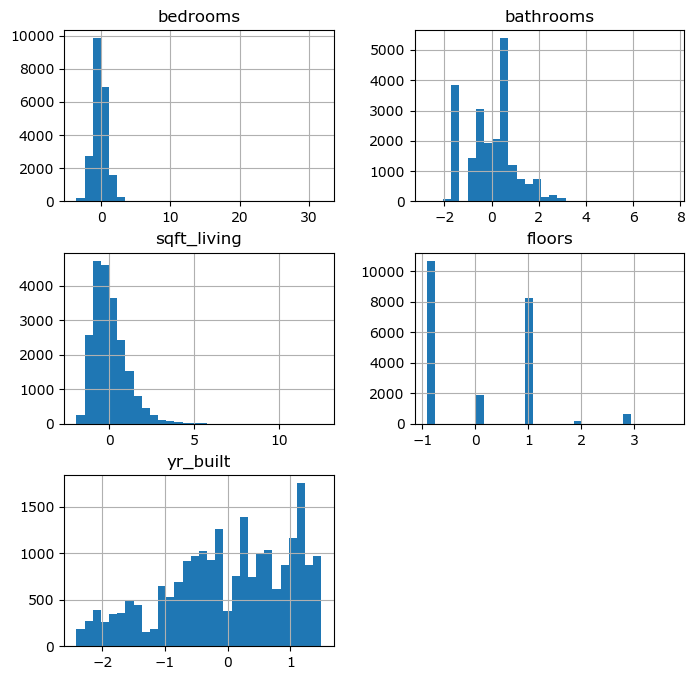

In [192]:
X.hist(bins=30, figsize=(8,8))

In [195]:
X

array([[-0.39872792, -1.44743008, -0.97981235, -0.91540583, -0.54488517],
       [-0.39872792,  0.17560263,  0.53362199,  0.93648411, -0.68106275],
       [-1.47392526, -1.44743008, -1.42622105, -0.91540583, -1.29386186],
       ...,
       [-1.47392526, -1.77203663, -1.15402062,  0.93648411,  1.29351217],
       [-0.39872792,  0.50020918, -0.52251564,  0.93648411,  1.12329019],
       [-1.47392526, -1.77203663, -1.15402062,  0.93648411,  1.25946777]])

### Functions for Scaling/Unscaling

In [121]:
def unscale(mean,std,scaled):
    return(scaled*(std)+mean)

def scale(mean,std,actual):
    return((actual-mean)/(std))

# Batch Gradient Descent

In [19]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features)) 
    b = 0
    m = X.shape[0] 
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/m)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/m)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) 
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


## 5000 epochs 

In [196]:
w = np.zeros([X.shape[1]])
w, b, cost, cost_list, epoch_list = batch_gradient_descent(X,y.reshape(y.shape[0],),5000, 0.01)
w, b, cost

(array([-0.1703242 ,  0.14389498,  0.74875388,  0.08216887, -0.27091865]),
 5.410224210109515e-16,
 0.4447996792842005)

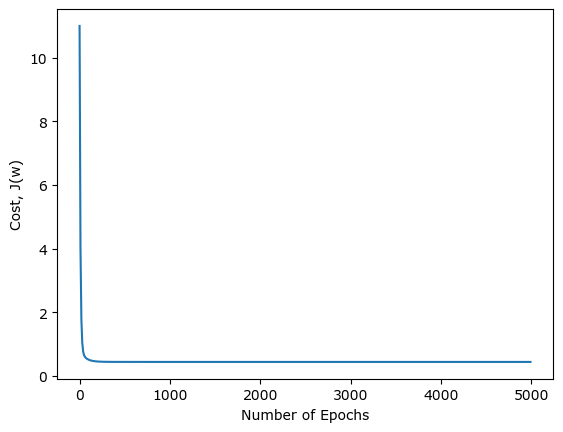

In [197]:
plt.xlabel("Number of Epochs")
plt.ylabel("Cost, J(w)")
plt.plot(epoch_list,cost_list)

## Making prediction using the learnt weights 

In [21]:
df.iloc[:,1]

0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 21613, dtype: int64

In [22]:
bed = scale(df.iloc[:,1].mean(),df.iloc[:,1].std(),4)

In [23]:
bath = scale(df.iloc[:,2].mean(),df.iloc[:,2].std(),2.5)
area = scale(df.iloc[:,3].mean(),df.iloc[:,3].std(),2570)
floors = scale(df.iloc[:,4].mean(),df.iloc[:,4].std(),2)
year = scale(df.iloc[:,5].mean(),df.iloc[:,5].std(),2005)

In [141]:
r = np.array([bed,bath,area,floors,year,1])

In [199]:
we = np.array([-0.1703242 ,  0.14389498,  0.74875388,  0.08216887, -0.27091865,
 5.428897613797639e-16])

In [200]:
pred = np.dot(r,we.T)
pred

0.1197163352848416

In [201]:
Price = unscale(df.iloc[:,0].mean(),df.iloc[:,0].std(),pred)
Price

584161.4188966597

In [202]:
Error = 100*(Price - 719000)/719000
print(Error,"%")

-18.753627413538283 %


## GD on 50000 epochs

In [203]:
w = np.zeros(X.shape[0])
b, cost, cost_list, epoch_list = 0,0,0,0
w, b, cost, cost_list, epoch_list = batch_gradient_descent(X,y.reshape(y.shape[0],),50000, 0.01)
w, b, cost

(array([-0.1703242 ,  0.14389498,  0.74875388,  0.08216887, -0.27091865]),
 5.274776281949039e-16,
 0.4447996792842005)

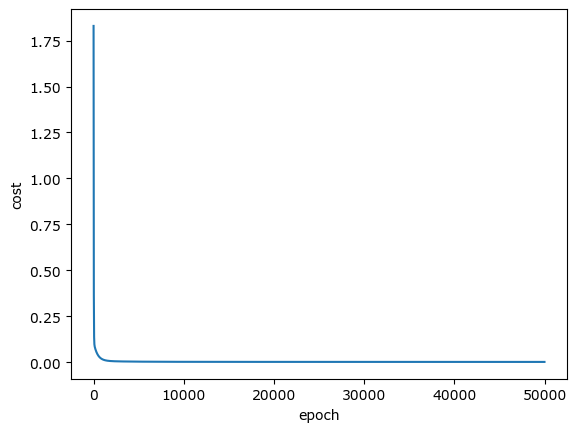

In [169]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [33]:
we = np.array([-0.1703242 ,  0.14389498,  0.74875388,  0.08216887, -0.27091865,
 5.274776281949039e-16])

**lr = 0.1**

In [205]:
w = np.zeros(X.shape[0])
b, cost, cost_list, epoch_list = 0,0,0,0
w, b, cost, cost_list, epoch_list = batch_gradient_descent(X,y.reshape(y.shape[0],),50000, 0.1)
w, b, cost

(array([-0.1703242 ,  0.14389498,  0.74875388,  0.08216887, -0.27091865]),
 5.533639628146942e-16,
 0.4447996792842005)

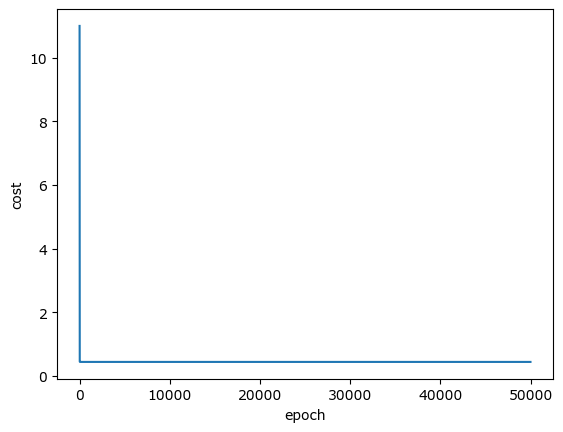

In [206]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

## Predictions:


In [134]:
pred = np.dot(r,we.T)
pred

0.1197163352848416

In [135]:
Price = unscale(df.iloc[:,0].mean(),df.iloc[:,0].std(),pred)
print("Predicted Price: ", Price)

Predicted Price:  584161.4188966597


In [136]:
Error = 100*(Price - 719000)/719000
print("Error=",Error,"%")

Error= -18.753627413538283 %


In [146]:
w = np.zeros(X.shape[0])
b, cost, cost_list, epoch_list = 10,0,0,0
w, b, cost, cost_list, epoch_list = batch_gradient_descent(X,y.reshape(y.shape[0],),5000, 0.1)
w, b, cost

(bedrooms      -0.170324
 bathrooms      0.143895
 sqft_living    0.748754
 floors         0.082169
 yr_built      -0.270919
 dtype: float64,
 5.533639628146942e-16,
 0.4447996792842005)

In [143]:
we = np.array([-0.170324,0.143895,0.748754,0.082169,-0.270919,5.481696005211625e-16])

In [144]:
pred = np.dot(r,we.T)
pred

Price = unscale(df.iloc[:,0].mean(),df.iloc[:,0].std(),pred)
print("Predicted Price: ", Price)

Error = 100*(Price - 719000)/719000
print("Error=",Error,"%")

Predicted Price:  584161.3917149897
Error= -18.753631194020908 %


**Prediction Using Min/Max Scaler**

In [157]:
X = df.iloc[:,1:6]
y = df.iloc[:,0]

In [158]:
X = (X-X.min())/(X.max()-X.min())
X = X.to_numpy()
y = (y-y.min())/(y.max()-y.min())
y = y.to_numpy()

In [159]:
w = np.zeros(X.shape[0])
b, cost, cost_list, epoch_list = 0,0,0,0
w, b, cost, cost_list, epoch_list = batch_gradient_descent(X,y.reshape(y.shape[0],),5000, 0.1)
w, b, cost

(array([ 0.38298603,  0.02662524,  0.38274923,  0.02502936, -0.04455136]),
 -0.014318598864087618,
 0.0012648647212010523)

In [155]:
we = np.array([0.38298603,  0.02662524,  0.38274923,  0.02502936, -0.04455136,
 -0.014318598864087618])

In [156]:
pred = np.dot(r,we.T)
pred

Price = unscale(df.iloc[:,0].mean(),df.iloc[:,0].std(),pred)
print("Predicted Price: ", Price)

Error = 100*(Price - 719000)/719000
print("Error=",Error,"%")

Predicted Price:  699690.8763774032
Error= -2.685552659610132 %


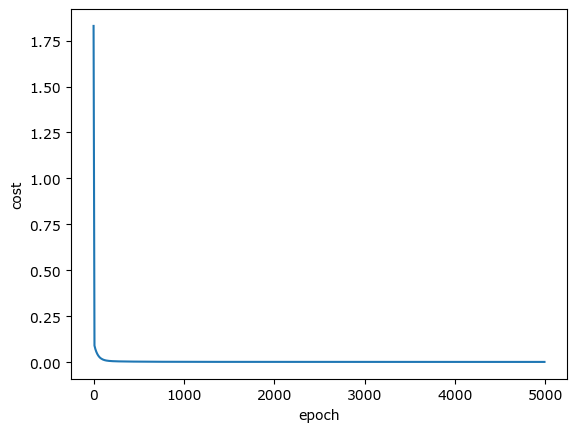

In [160]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)